In [2]:
%reset -f 
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from joblib import Parallel, delayed

/tmp/ipykernel_9192/3976542607.py:5: RuntimeWarning: divide by zero encountered in divide
  k = lambda x   : 2 / x**2
/tmp/ipykernel_9192/3976542607.py:12: RuntimeWarning: invalid value encountered in multiply
  return - 1 / (np.pi**2 * n * m) * l(n, x) * k(x) * np.conj(l(m, x)) / (- np.sqrt(-λ(n)) * np.sqrt(-λ(m)))


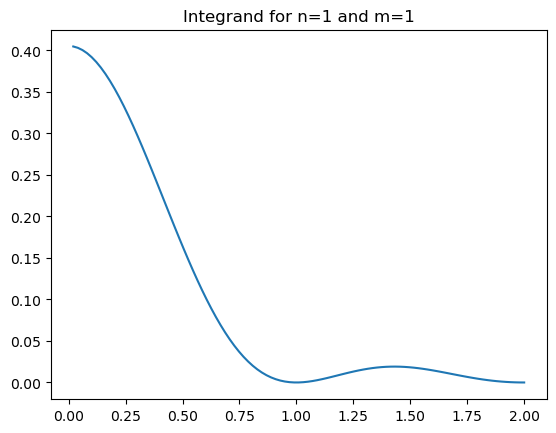

In [3]:
# General parameters
R = 1

# Relevant functions
k = lambda x   : 2 / x**2
l = lambda n, x: np.sqrt(2) * np.sin(n * np.pi * x / R)
λ = lambda n   : - (n * np.pi / R)**2

# Integration
def integrand(x, n, m):
    # denumerator: negative due to the product of two complex values
    return - 1 / (np.pi**2 * n * m) * l(n, x) * k(x) * np.conj(l(m, x)) / (- np.sqrt(-λ(n)) * np.sqrt(-λ(m)))              

# Visulation of the integrand
n, m = 1, 1
x_val = np.linspace(0, 2, 100)
plt.figure
plt.plot(x_val, integrand(x_val, n, m));
plt.title(f"Integrand for n={n} and m={m}");

In [4]:
n_max, m_max = 100, 100
K1 = np.zeros((n_max, m_max))

start = time.time()

for n in range(n_max):
    for m in range(m_max):
        K1[n, m] = integrate.quad(integrand, 0, R, args=(n + 1, m + 1))[0]
        
stop = time.time()

print(f"Elapsed time: {stop - start}")

Elapsed time: 11.622251987457275


In [5]:
n_max, m_max = 100, 100
start = time.time()

K = np.array([
    [integrate.quad(integrand, 0, R, args=(n + 1, m + 1))[0] for m in range(m_max)]
    for n in range(n_max)
])

stop = time.time()

print(f"Elapsed time: {stop - start}")

Elapsed time: 13.05661153793335


In [9]:
n_max, m_max = 100, 100

def compute_integral(n, m):
    return integrate.quad(integrand, 0, R, args=(n + 1, m + 1))[0]

start = time.time()

K = np.array(Parallel(n_jobs=-1)(delayed(compute_integral)(n, m) for n in range(n_max) for m in range(m_max))).reshape(n_max, m_max)

stop = time.time()

print(stop - start)

2.4520561695098877


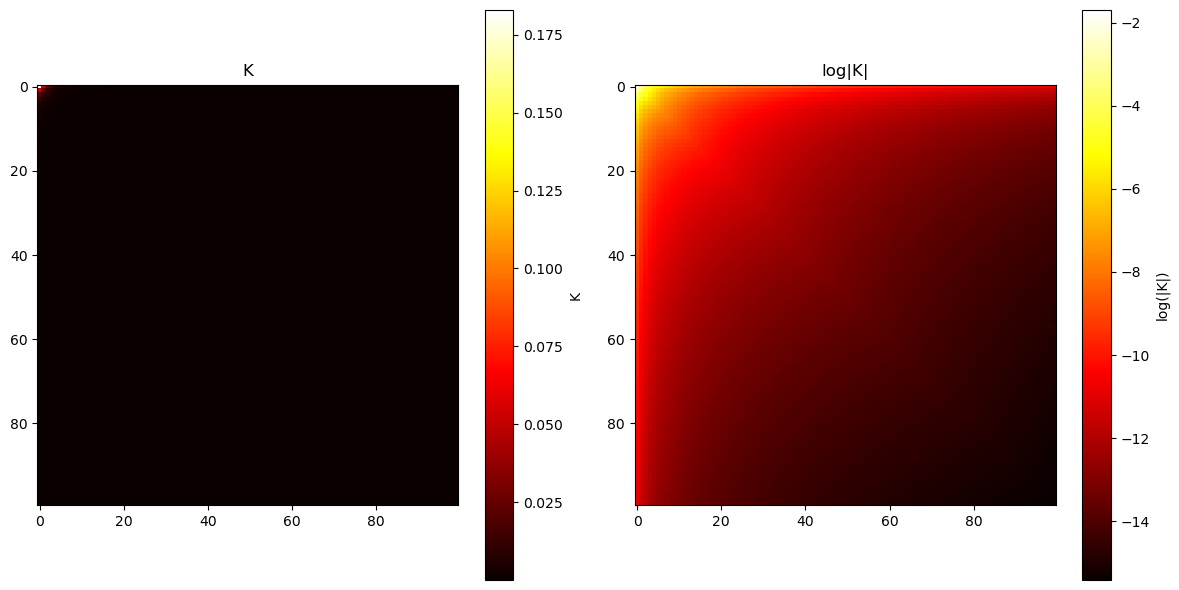

In [10]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: log(abs(K))
im1 = axes[0].imshow(K, cmap="hot")
axes[0].set_title("K")
fig.colorbar(im1, ax=axes[0], label="K")

# Second subplot: abs(K)
im2 = axes[1].imshow(np.log(np.abs(K)), cmap="hot")
axes[1].set_title("log|K|")
fig.colorbar(im2, ax=axes[1], label="log(|K|)")

plt.tight_layout()
plt.show()